In [24]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import math
from torch.nn.modules.activation import Module
from torch import Tensor

In [2]:
class BiHiperbolic(Module):
    def forward(self, input: Tensor) -> Tensor:
        return bi_hiperbolic(input, 1,2,180)
    

In [4]:
def bi_hiperbolic(x, t1, t2, alpha):
    derived_lambd = 1/2 * math.tanh(alpha)
    tal1 = math.sqrt(1/16 + t2**2)
    tal2 = math.sqrt(1/16 + t2**2)
    
    lamb1 = 4 * derived_lambd * tal1
    lamb2 = 4 * derived_lambd * tal2
    
    return np.sqrt( (lamb1 ** 2) * ((x + (1/4*lamb1)) ** 2)  + (tal1 ** 2)) - \
            np.sqrt( (lamb2 ** 2) * ((x - (1/4*lamb2)) ** 2)  + (tal2 ** 2)) + 0.5

In [36]:
x = np.arange(start=-4, stop=4.1, step=0.1)
x

array([-4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
       -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
       -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
       -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
       -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
       -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        3.55271368e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  

In [41]:
out = bi_hiperbolic(x, 2, 1, 90)
out

array([-1.60832107, -1.60745076, -1.60651043, -1.60549233, -1.60438766,
       -1.6031863 , -1.6018766 , -1.60044514, -1.59887632, -1.59715198,
       -1.59525083, -1.59314783, -1.59081335, -1.58821211, -1.58530185,
       -1.58203161, -1.57833951, -1.57414982, -1.56936907, -1.5638809 ,
       -1.55753907, -1.55015783, -1.54149868, -1.53125172, -1.51900918,
       -1.50422744, -1.48617192, -1.46383684, -1.43582878, -1.40020109,
       -1.35423086, -1.29415615, -1.21497037, -1.11053627, -0.97446682,
       -0.80203923, -0.59241635, -0.34948969, -0.080617  ,  0.2054633 ,
        0.5       ,  0.7945367 ,  1.080617  ,  1.34948969,  1.59241635,
        1.80203923,  1.97446682,  2.11053627,  2.21497037,  2.29415615,
        2.35423086,  2.40020109,  2.43582878,  2.46383684,  2.48617192,
        2.50422744,  2.51900918,  2.53125172,  2.54149868,  2.55015783,
        2.55753907,  2.5638809 ,  2.56936907,  2.57414982,  2.57833951,
        2.58203161,  2.58530185,  2.58821211,  2.59081335,  2.59

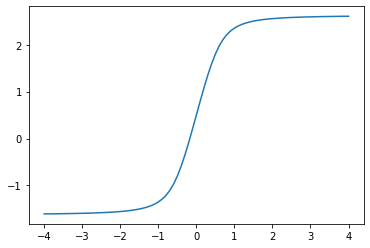

In [42]:
plt.plot(x, out)

In [5]:
m = BiHiperbolic()


In [10]:
input = torch.randn(32, 60, 13)
input.shape

torch.Size([32, 60, 13])

In [11]:
output = m(input)

In [12]:
output

tensor([[[-7.1285, -6.8393,  3.2700,  ..., -0.0375, -5.7106,  0.7293],
         [-2.1732, -5.1392, -3.4845,  ..., -0.7053,  5.0790, -1.1945],
         [ 2.2142,  7.9133,  2.9464,  ..., -7.4145,  2.6067, -5.7631],
         ...,
         [ 8.1313,  8.0889,  5.3387,  ..., -5.2250, -4.8150,  0.5911],
         [-4.7122,  3.9867,  6.1173,  ..., -5.3176,  2.0124,  7.7900],
         [ 1.0233, -0.7781,  4.8451,  ..., -3.9041,  2.3354,  7.0323]],

        [[-0.1910, -5.7293,  1.6029,  ..., -7.4311, -7.0386,  6.7469],
         [-7.4110,  7.1535, -7.2728,  ...,  7.7997, -5.8576,  1.2917],
         [-6.9892, -6.0069,  4.7170,  ..., -6.7461,  6.6840,  2.8226],
         ...,
         [ 7.8105,  4.0882,  1.2261,  ..., -5.6904,  7.4919, -6.5851],
         [-7.3695, -6.2423, -3.1919,  ...,  1.7621,  6.0616,  1.7207],
         [ 7.0923, -7.2194,  7.8597,  ...,  5.5858, -0.5186, -4.5218]],

        [[ 3.6339,  3.4489,  0.7287,  ...,  8.1868, -6.8639,  3.9586],
         [ 5.3146,  1.6853,  8.5317,  ...,  7